# hist level3 vs L1

note hist level 3 has more than what the function returns!! But this is all we use

When cloud status==0 -> no significant backscatter:
* hist3 -> invalid (-999)
* l1 -> 0

In [3]:
import ceilopy as cp

In [18]:
fn = '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/hist/202308_CEILOMETER_1_LEVEL_3_DEFAULT_01.his'

# df = pd.read_csv(fn, header=1)
# df

hist = cp.read_level3_hist(fn)

In [20]:
hist

,CEILOMETER,CLOUD_1,CLOUD_2,CLOUD_3,CLOUD_STATUS
time,,,,,
2023-08-01 00:00:00,r1350815,3790,4060,-999,2
2023-08-01 00:00:16,r1350815,3790,4060,-999,2
2023-08-01 00:00:32,r1350815,3790,4060,-999,2
2023-08-01 00:00:48,r1350815,3860,-999,-999,1
2023-08-01 00:01:04,r1350815,3860,-999,-999,1
...,...,...,...,...,...
2023-08-01 23:58:40,r1350815,8040,8250,-999,2
2023-08-01 23:58:56,r1350815,7730,7990,-999,2
2023-08-01 23:59:12,r1350815,7730,7990,-999,2


In [ ]:
fn = '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202308010000_r1350815.nc'
l1 = xr.open_dataset(fn)
# l1 = cp.read_L1(pl.Path(fn), type('bla', (), {}))

l1 = l1.assign_coords({'timeDim':pd.to_datetime(l1.time, unit = 's')})

Text(0.5, 1.0, 'cloudlayer: 1')

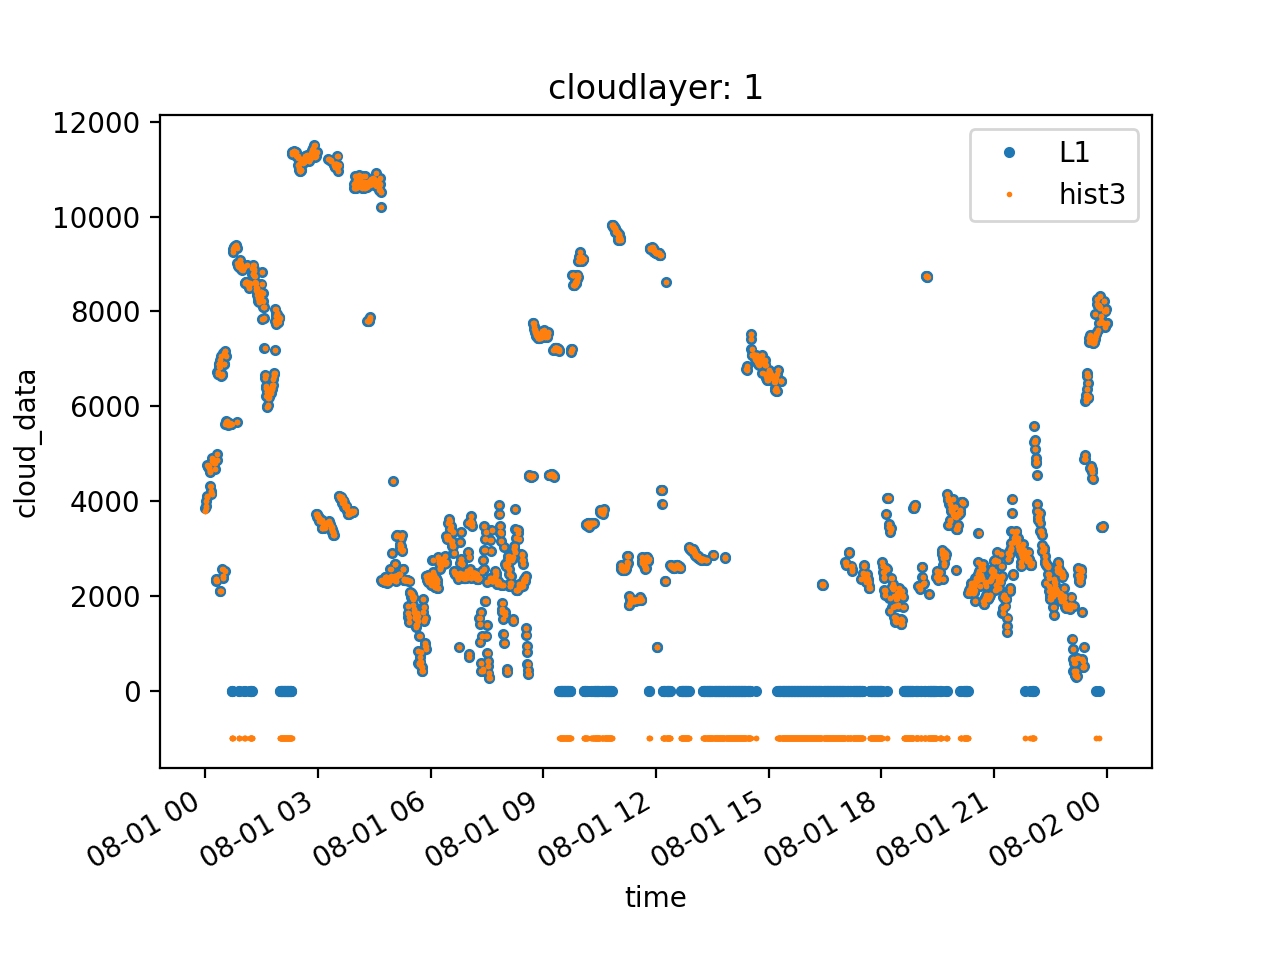

In [57]:
%matplotlib widget
cl = 1
f,a = plt.subplots()
l1.cloud_data.sel(cloud_dataDim = cl-1).plot(marker = '.', ls = '', ax = a, label = 'L1')
hist[f'CLOUD_{cl}'].plot(marker = '.', ls = '', ax = a, markersize = 2, label = 'hist3')
a.legend()
a.set_title(f'cloudlayer: {cl}')

Text(0.5, 1.0, 'cloudlayer: 1')

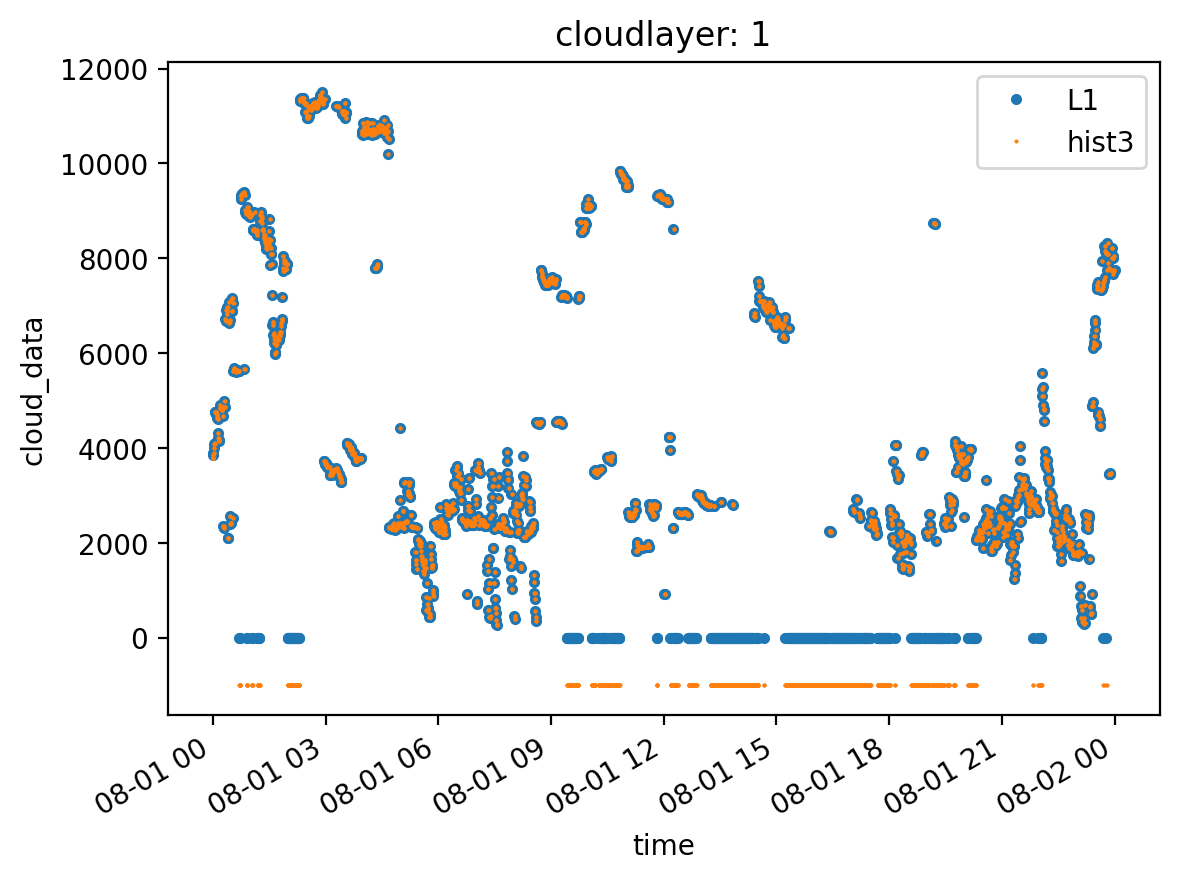

In [51]:
cl = 1
f,a = plt.subplots()
l1.cloud_data.sel(cloud_dataDim = cl-1).plot(marker = '.', ls = '', ax = a, label = 'L1')
hist[f'CLOUD_{cl}'].plot(marker = '.', ls = '', ax = a, markersize = 1, label = 'hist3')
a.legend()
a.set_title(f'cloudlayer: {cl}')

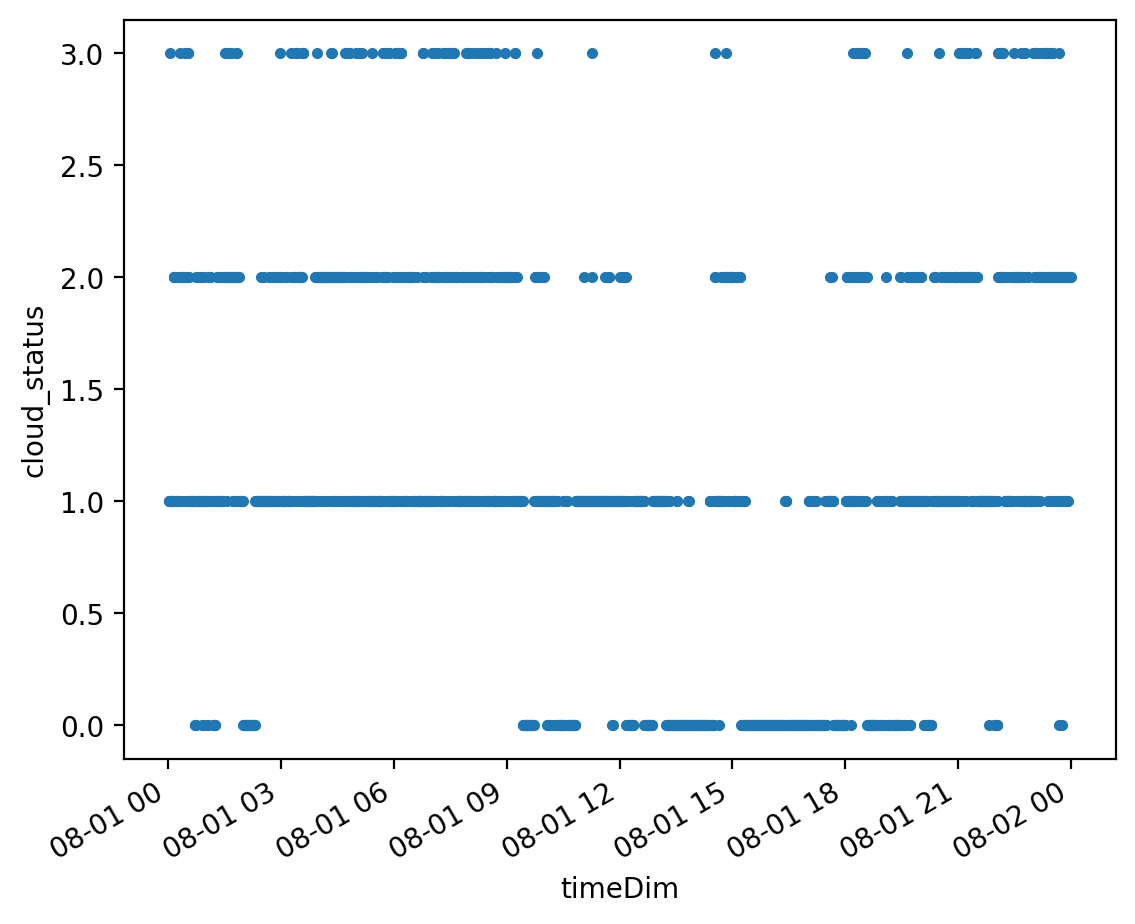

In [53]:
cl = 1
f,a = plt.subplots()
l1.cloud_status.sel(cloud_statusDim = 0).plot(marker = '.', ls = '', ax = a, label = 'L1')
# hist[f'CLOUD_{cl}'].plot(marker = '.', ls = '', ax = a, markersize = 1, label = 'hist3')
# a.legend()
# a.set_title(f'cloudlayer: {cl}')

# L1 vs L2 vs L3

In [58]:
fn = '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L1_CBC_202308010000_r1350815.nc'
l1 = xr.open_dataset(fn)
# l1 = cp.read_L1(pl.Path(fn), type('bla', (), {}))
l1 = l1.assign_coords({'timeDim':pd.to_datetime(l1.time, unit = 's')})

In [ ]:
fn = '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L2_CBC_202308010000_r1350815.nc'
l2 = xr.open_dataset(fn)

In [61]:
l2 = l2.assign_coords({'timeDim':pd.to_datetime(l2.time, unit = 's')})

<xarray.DataArray 'profile_data' (range: 1540)>
array([  390.,   390.,   430., ..., 34000., 35260., 44810.])
Coordinates:
  * range    (range) int32 10 20 30 40 50 60 ... 15360 15370 15380 15390 15400
    timeDim  datetime64[ns] 2023-08-01T00:02:21

In [73]:
l1.timeDim.values[i]

numpy.datetime64('2023-08-01T00:02:21.000000000')

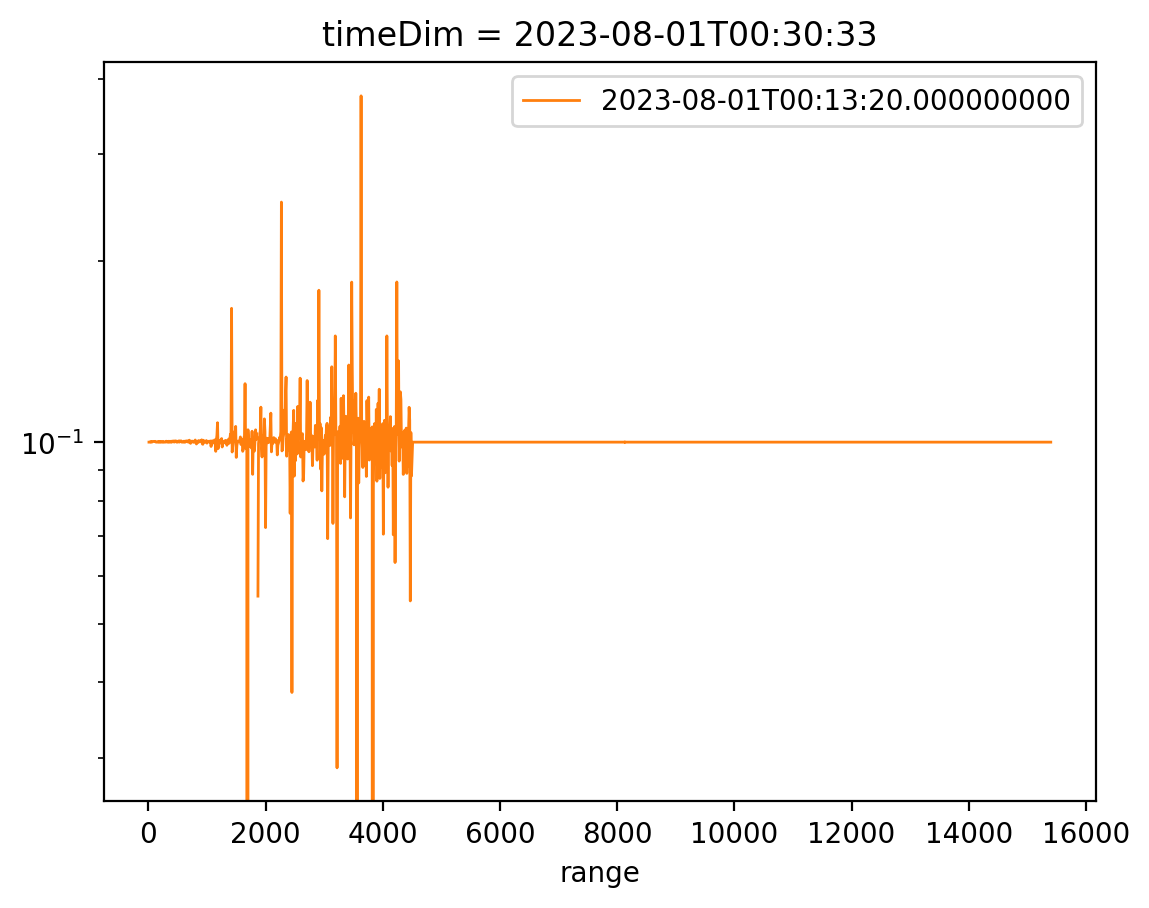

In [92]:
%matplotlib inline
f,a = plt.subplots()
i = 5
(l1.rcs_910[i]/l2.profile_data.interp(timeDim = l1.timeDim.values[i], method = 'nearest')).plot.line(x = 'range',ax = a, color = colors[1], label = l2.timeDim.values[i], lw = '1')
# l2.profile_data[i-1].plot.line(x = 'range',ax = at, color = colors[1], label = l2.timeDim.values[i])
a.legend()
a.set_yscale('log')

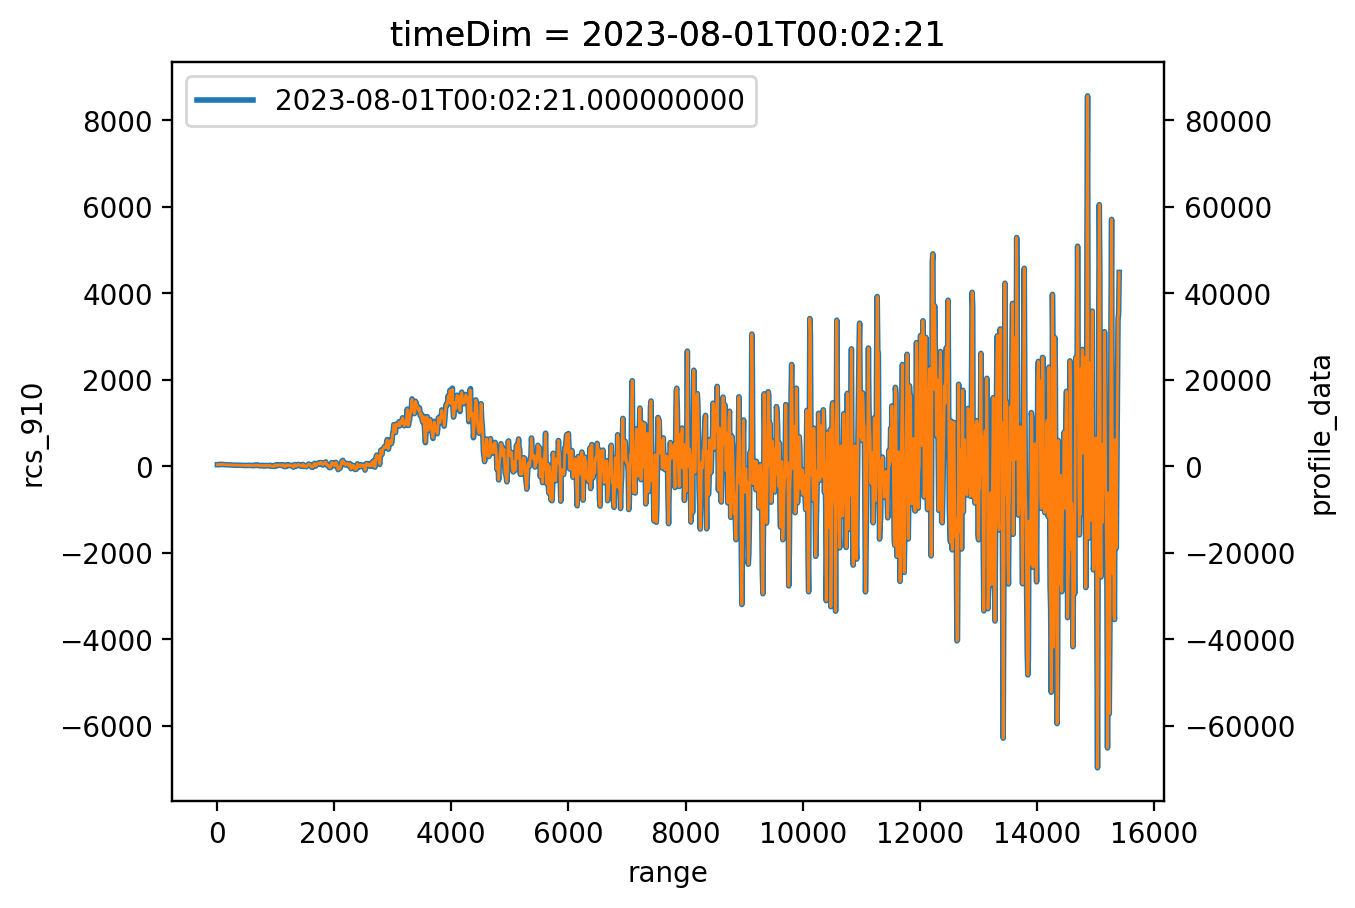

In [75]:
%matplotlib inline
f,a = plt.subplots()
i = 3
l1.rcs_910[i].plot.line(x = 'range', ax = a, label = l1.timeDim.values[i,], lw = 2)

at = a.twinx()
# at = a
l2.profile_data.interp(timeDim = l1.timeDim.values[i], method = 'nearest').plot.line(x = 'range',ax = at, color = colors[1], label = l2.timeDim.values[i], lw = '1')
# l2.profile_data[i-1].plot.line(x = 'range',ax = at, color = colors[1], label = l2.timeDim.values[i])
a.legend()

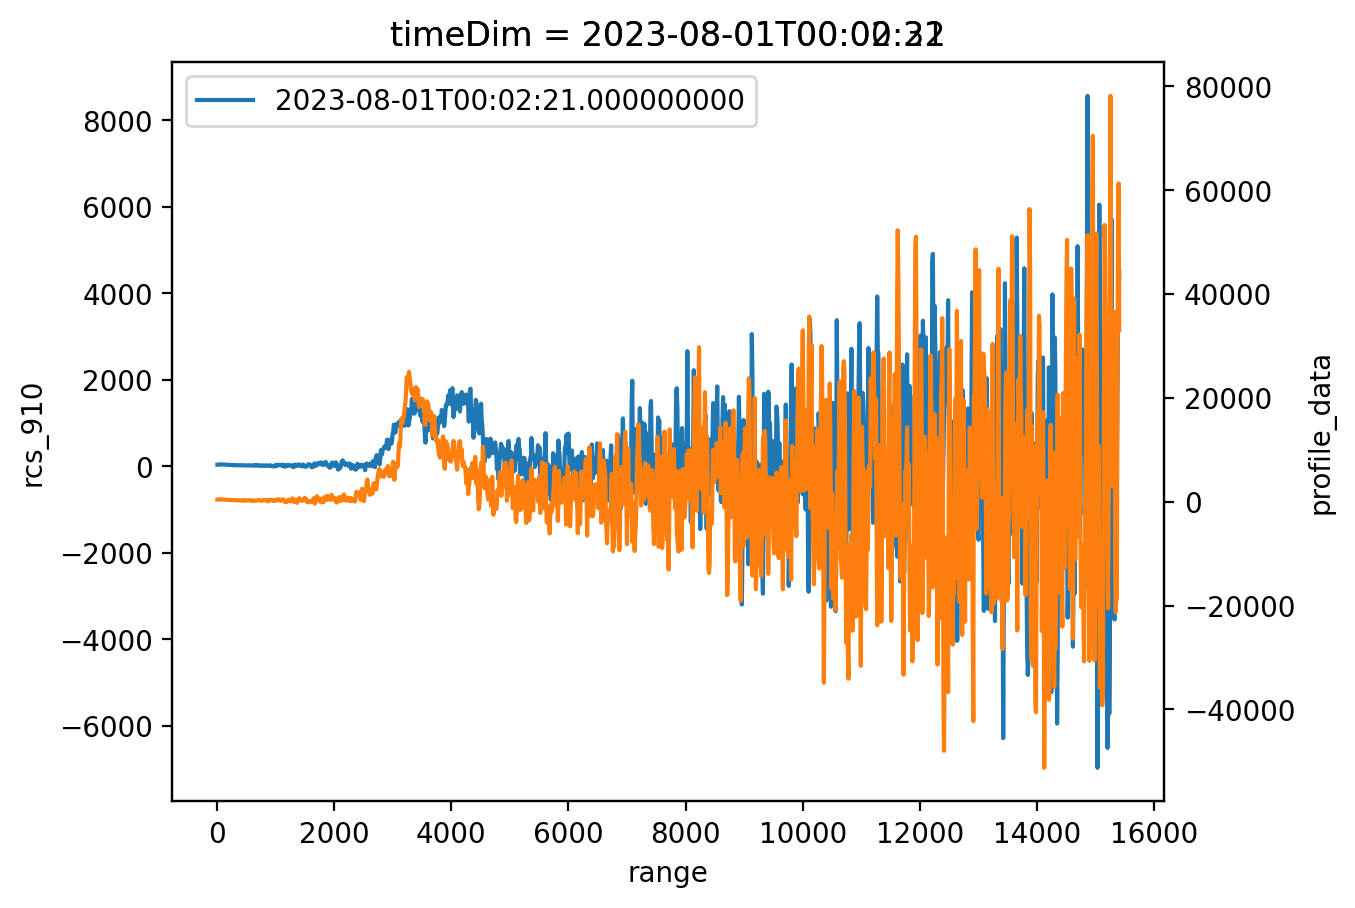

In [70]:
%matplotlib inline
f,a = plt.subplots()
i = 3
l1.rcs_910[i].plot.line(x = 'range', ax = a, label = l1.timeDim.values[i])

at = a.twinx()
l2.profile_data[i-1].plot.line(x = 'range',ax = at, color = colors[1], label = l2.timeDim.values[i])
a.legend()

In [68]:
l1.timeDim.values[i]

numpy.datetime64('2023-08-01T00:02:21.000000000')

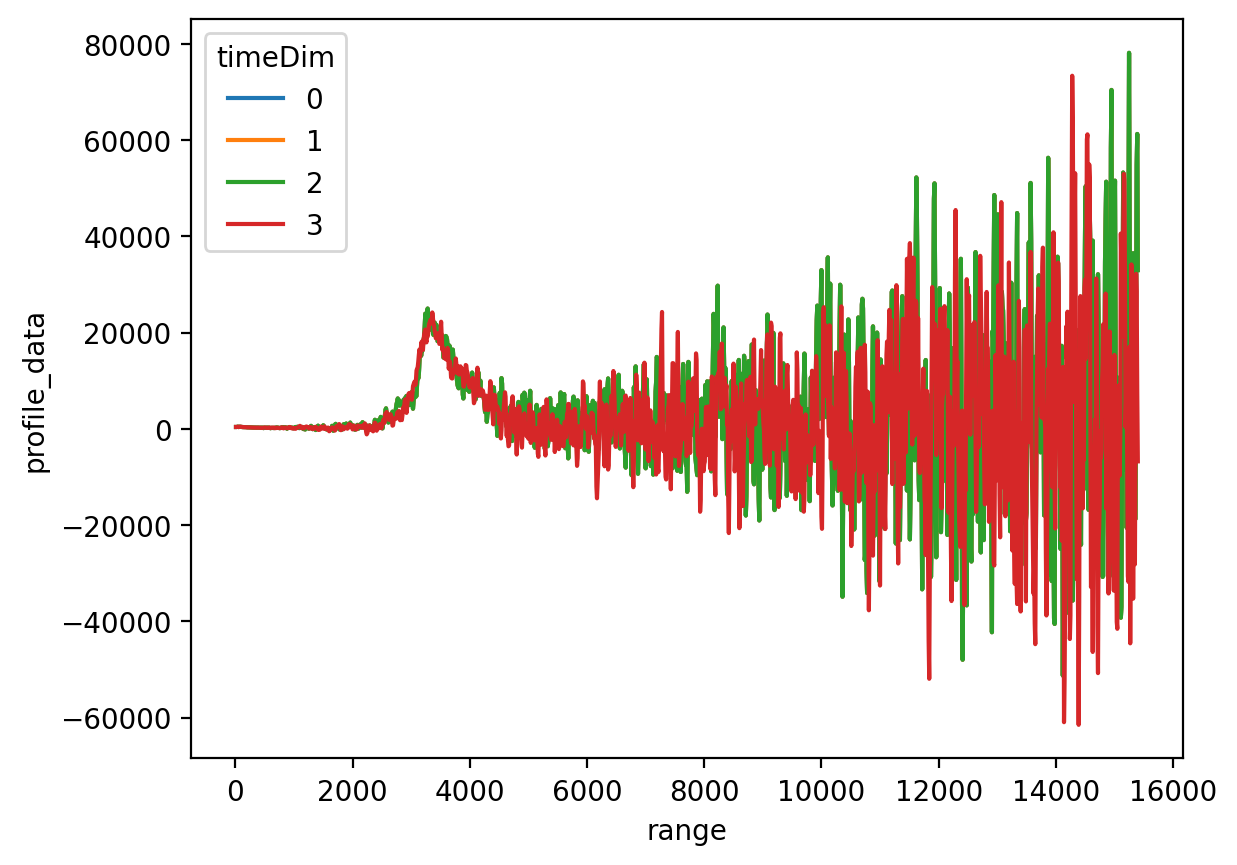

In [38]:
%matplotlib inline
f,a= plt.subplots()
dsl2.profile_data[:4].plot.line(x = 'range',ax = a)#, color = colors[1:4])

((1540,), (1540,))

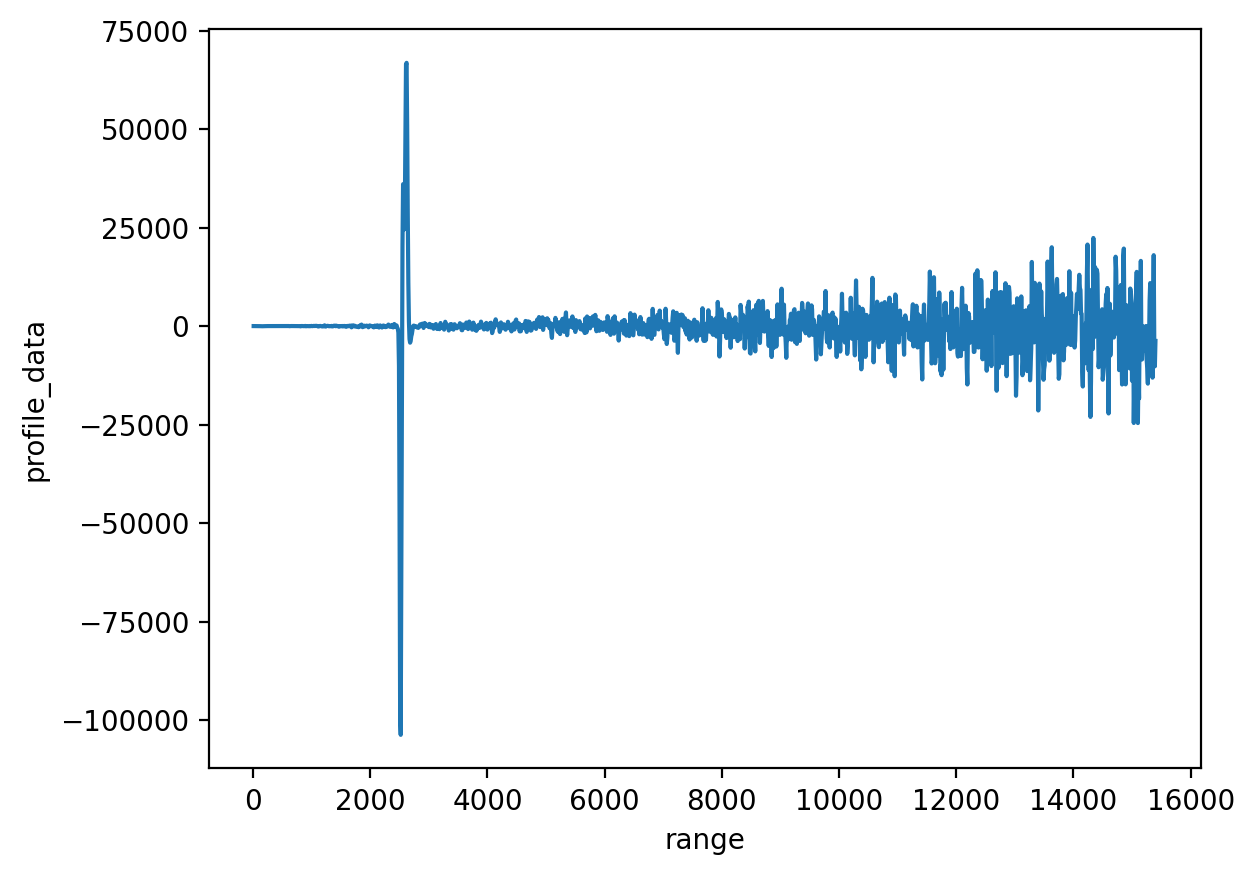

In [58]:
%matplotlib inline
f,a= plt.subplots()
i =2504
(dsl2.profile_data[i] - dsl2.profile_data[i+1]).plot(ax = a)

# dsl2.profile_data[:4].plot.line(x = 'range',ax = a)#, color = colors[1:4])
dsl2.profile_data[i].shape, dsl2.profile_data[i+2].shape

In [13]:
pd.to_datetime(ds.time, unit = 's')

DatetimeIndex(['2023-08-01 00:00:33', '2023-08-01 00:01:09',
               '2023-08-01 00:01:45', '2023-08-01 00:02:21',
               '2023-08-01 00:02:57', '2023-08-01 00:03:33',
               '2023-08-01 00:04:09', '2023-08-01 00:04:45',
               '2023-08-01 00:05:21', '2023-08-01 00:05:57',
               ...
               '2023-08-01 23:54:32', '2023-08-01 23:55:08',
               '2023-08-01 23:55:44', '2023-08-01 23:56:20',
               '2023-08-01 23:56:56', '2023-08-01 23:57:32',
               '2023-08-01 23:58:08', '2023-08-01 23:58:44',
               '2023-08-01 23:59:20', '2023-08-01 23:59:56'],
              dtype='datetime64[ns]', length=2400, freq=None)

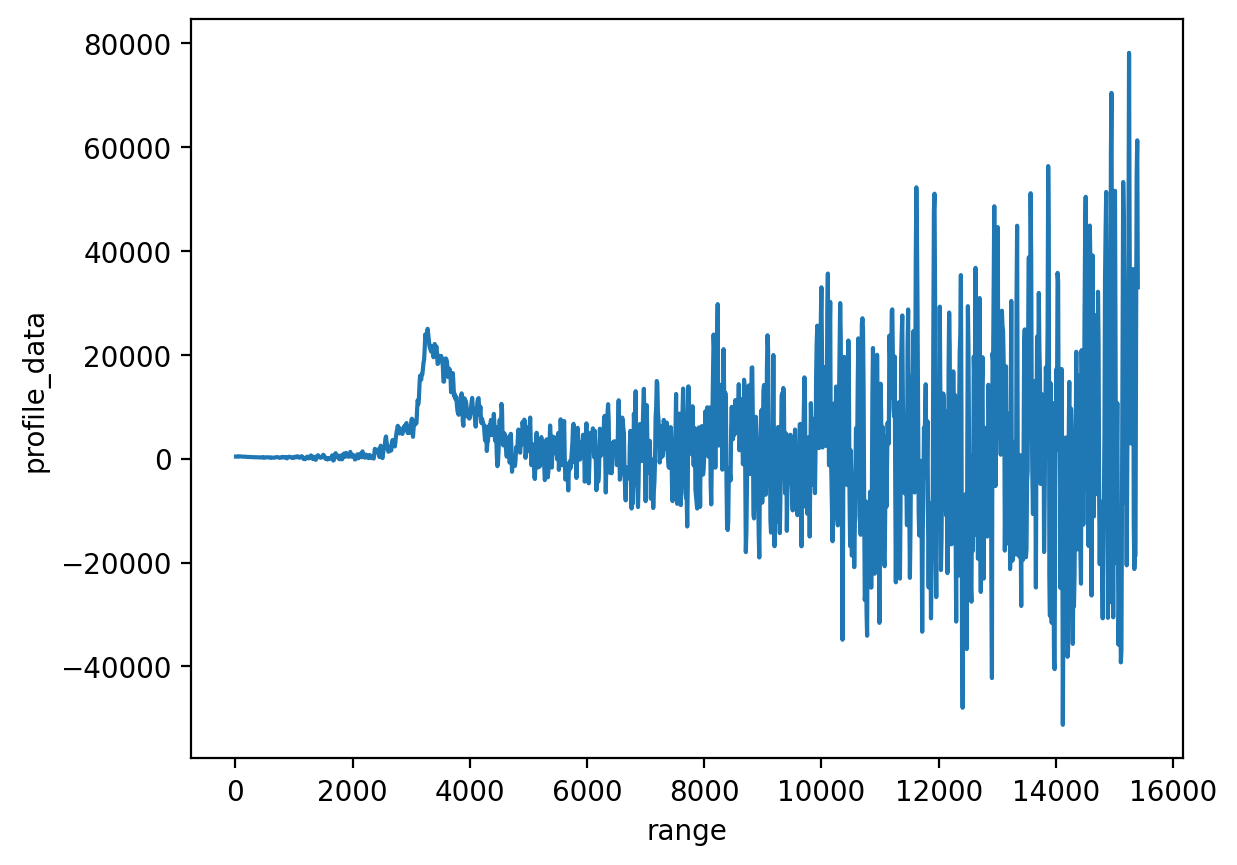

In [22]:
dsl2.profile_data[2].plot()

In [59]:
fn = '/nfs/grad/gradobs/raw/short_term/sailsplash/Ceil/CBC/bl/L3_DEFAULT_CBC_202308010000_1_360_1_3120_10_30_4000_3_0_1_500_1000_4000_60_r1350815.nc'
dsl3 = xr.open_dataset(fn)

In [62]:
pd.to_datetime(dsl3.time, unit = 's')

DatetimeIndex(['2023-08-01 00:00:00', '2023-08-01 00:00:16',
               '2023-08-01 00:00:32', '2023-08-01 00:00:48',
               '2023-08-01 00:01:04', '2023-08-01 00:01:20',
               '2023-08-01 00:01:36', '2023-08-01 00:01:52',
               '2023-08-01 00:02:08', '2023-08-01 00:02:24',
               ...
               '2023-08-01 23:57:20', '2023-08-01 23:57:36',
               '2023-08-01 23:57:52', '2023-08-01 23:58:08',
               '2023-08-01 23:58:24', '2023-08-01 23:58:40',
               '2023-08-01 23:58:56', '2023-08-01 23:59:12',
               '2023-08-01 23:59:28', '2023-08-01 23:59:44'],
              dtype='datetime64[ns]', length=5400, freq=None)

In [64]:
dsl3

<xarray.Dataset>
Dimensions:                      (timeDim: 5400, nameDim: 1, date_stampDim: 1,
                                  message_typeDim: 1, periodDim: 1,
                                  Mean_Layer_HeightDim: 1,
                                  Mean_Layer_QualityIndexDim: 1,
                                  Mean_Layer_Calculation_TimeDim: 1,
                                  cloud_statusDim: 1, cloud_dataDim: 3,
                                  ...
                                  Location_longitudeDim: 1,
                                  Location_altitudeDim: 1,
                                  location_utc_offsetDim: 1,
                                  Alogrithm_MethodDim: 1, parameter_keyDim: 1,
                                  sunrise_utcDim: 1, sunset_utcDim: 1,
                                  LevelTwoCountDim: 1)
Coordinates:
  * range                        (range) int32 10 20 30 40 ... 4480 4490 4500
Dimensions without coordinates: timeDim, nameDim, date_stampDim,
                                message_typeDim, periodDim,
                                Mean_Layer_HeightDim,
                                Mean_Layer_QualityIndexDim,
                                Mean_Layer_Calculation_TimeDim,
                                cloud_statusDim, cloud_dataDim,
                                ...
                                boundary_layer_minDim, boundary_layer_maxDim,
                                number_of_boundary_layersDim,
                                Location_latitudeDim, Location_longitudeDim,
                                Location_altitudeDim, location_utc_offsetDim,
                                Alogrithm_MethodDim, parameter_keyDim,
                                sunrise_utcDim, sunset_utcDim, LevelTwoCountDim
Data variables: (12/38)
    time                         (timeDim) int32 1690848000 ... 1690934384
    name                         (timeDim, nameDim) object ...
    date_stamp                   (timeDim, date_stampDim) object ...
    message_type                 (timeDim, message_typeDim) int32 ...
    period                       (timeDim, periodDim) int32 ...
    Mean_Layer_Height            (timeDim, Mean_Layer_HeightDim) int32 ...
    ...                           ...
    location_utc_offset          (timeDim, location_utc_offsetDim) float32 ...
    Alogrithm_Method             (timeDim, Alogrithm_MethodDim) int32 ...
    parameter_key                (timeDim, parameter_keyDim) object ...
    sunrise_utc                  (timeDim, sunrise_utcDim) float32 ...
    sunset_utc                   (timeDim, sunset_utcDim) float32 ...
    LevelTwoCount                (timeDim, LevelTwoCountDim) int32 ...
Attributes:
    site_location:  r1350815

In [63]:
dsl3.profile_data[2].plot()

AttributeError: 'Dataset' object has no attribute 'profile_data'